#Facial Emotion

dataset: https://www.kaggle.com/datasets/mh0386/facial-emotion


## SELECCION Y PREPROCESAMIENTO DEL DATASET

In [ ]:
!pip install opencv-python

In [ ]:
!pip install tensorflow


### A EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/modulo10_proyecto2/facial_emotions.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("./facial_emotions")
zip_object.close()

In [ ]:
from PIL import Image
import cv2
from collections import Counter
import os

plt.style.use('default')
sns.set_palette("husl")

# Definir rutas
base_path = 'facial_emotions'
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')

In [ ]:
emotions = ['Contempt', 'angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprised']

In [ ]:
# Contar imágenes por emoción en train y test

train_counts = {}
test_counts = {}
total_counts = {}

for emotion in emotions:
    train_emotion_path = os.path.join(train_path, emotion)
    test_emotion_path = os.path.join(test_path, emotion)

    train_count = len([f for f in os.listdir(train_emotion_path) if f.endswith('.jpg')])
    test_count = len([f for f in os.listdir(test_emotion_path) if f.endswith('.jpg')])

    train_counts[emotion] = train_count
    test_counts[emotion] = test_count
    total_counts[emotion] = train_count + test_count

# Crear DataFrame con estadísticas

stats_df = pd.DataFrame({
    'Emotion': emotions,
    'Train': [train_counts[e] for e in emotions],
    'Test': [test_counts[e] for e in emotions],
    'Total': [total_counts[e] for e in emotions]
})

In [ ]:
print("\n" + "="*50)
print("1. DISTRIBUCIÓN DE IMÁGENES POR EMOCIÓN:")
print(stats_df)
print(f"\nTotal de imágenes: {stats_df['Total'].sum()}")
print(f"Promedio por emoción: {stats_df['Total'].mean():.1f}")
print(f"Desviación estándar: {stats_df['Total'].std():.1f}")


1. DISTRIBUCIÓN DE IMÁGENES POR EMOCIÓN:
     Emotion  Train  Test  Total
0   Contempt     14     5     19
1      angry     14     5     19
2    disgust     14     5     19
3       fear     14     5     19
4      happy     14     5     19
5    neutral     14     5     19
6        sad     14     5     19
7  surprised     14     5     19

Total de imágenes: 152
Promedio por emoción: 19.0
Desviación estándar: 0.0


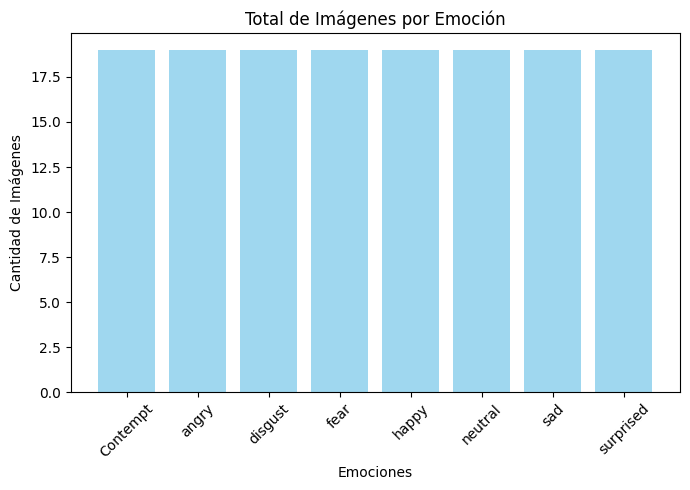

In [ ]:
plt.figure(figsize=(7, 5))
plt.bar(stats_df['Emotion'], stats_df['Total'], color='skyblue', alpha=0.8)
plt.title('Total de Imágenes por Emoción')
plt.xlabel('Emociones')
plt.ylabel('Cantidad de Imágenes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

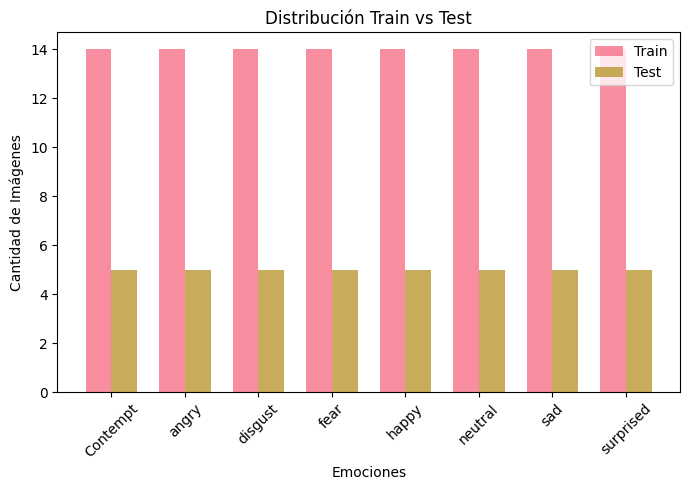

In [ ]:
plt.figure(figsize=(7, 5))
x_pos = np.arange(len(emotions))
width = 0.35
plt.bar(x_pos - width/2, stats_df['Train'], width, label='Train', alpha=0.8)
plt.bar(x_pos + width/2, stats_df['Test'], width, label='Test', alpha=0.8)
plt.title('Distribución Train vs Test')
plt.xlabel('Emociones')
plt.ylabel('Cantidad de Imágenes')
plt.xticks(x_pos, emotions, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print("\n" + "="*50)
print("2. ANÁLISIS DE CARACTERÍSTICAS DE IMÁGENES:")

sample_images_info = []
sample_size_per_emotion = 10

for emotion in emotions:
    emotion_path = os.path.join(train_path, emotion)
    image_files = [f for f in os.listdir(emotion_path) if f.endswith('.jpg')]

    for i, img_file in enumerate(image_files[:sample_size_per_emotion]):
        img_path = os.path.join(emotion_path, img_file)
        img = cv2.imread(img_path)
        if img is not None:
            height, width, channels = img.shape
            file_size = os.path.getsize(img_path) / 1024  # KB
            sample_images_info.append({
                'emotion': emotion,
                'height': height,
                'width': width,
                'channels': channels,
                'file_size_kb': file_size
            })

# Crear DataFrame con información de imágenes
images_df = pd.DataFrame(sample_images_info)

print("Estadísticas de dimensiones de imágenes (muestra):")
print(images_df.groupby('emotion')[['height', 'width', 'file_size_kb']].agg(['min', 'max']).round(2))



2. ANÁLISIS DE CARACTERÍSTICAS DE IMÁGENES:
Estadísticas de dimensiones de imágenes (muestra):
          height       width       file_size_kb         
             min   max   min   max          min      max
emotion                                                 
Contempt     720  5184  1280  3888       144.90  9455.41
angry        720  5184  1280  3880       115.16  9302.21
disgust      720  5184  1280  3880       141.59  9542.76
fear        1120  5184  1448  3888       149.10  5683.31
happy        720  5184  1280  3880       131.42  8962.37
neutral      720  5184  1280  3880       147.03  8678.89
sad         1120  4608  1448  3888        95.12  4929.49
surprised    720  3888  1280  3888       141.05  4841.95



3. MUESTRAS VISUALES DEL DATASET:


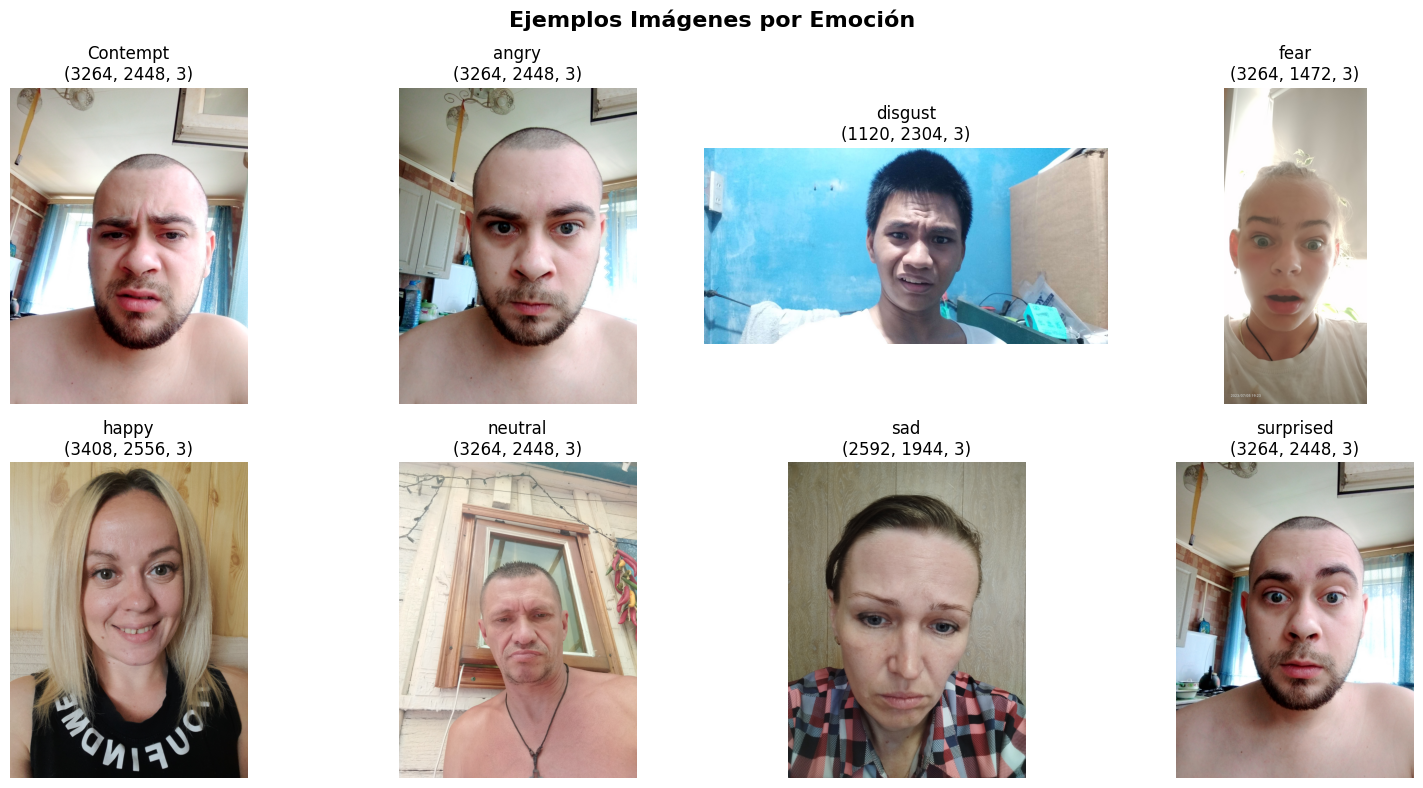

In [ ]:
print("\n3. MUESTRAS VISUALES DEL DATASET:")

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Ejemplos Imágenes por Emoción', fontsize=16, fontweight='bold')

for idx, emotion in enumerate(emotions):
    emotion_path = os.path.join(train_path, emotion)
    image_files = [f for f in os.listdir(emotion_path) if f.endswith('.jpg')]

    if image_files:
        sample_img_path = os.path.join(emotion_path, image_files[0])
        img = cv2.imread(sample_img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        row = idx // 4
        col = idx % 4
        axes[row, col].imshow(img_rgb)
        axes[row, col].set_title(f'{emotion}\n{img_rgb.shape}')
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
print("\n" + "="*50)
print("4. ANÁLISIS DE BALANCE DEL DATASET:")

# Calcular métricas de balance
total_images = stats_df['Total'].sum()
min_count = stats_df['Total'].min()
max_count = stats_df['Total'].max()
balance_ratio = min_count / max_count

print(f"Clase con menos imágenes: {stats_df.loc[stats_df['Total'].idxmin(), 'Emotion']} ({min_count} imágenes)")
print(f"Clase con más imágenes: {stats_df.loc[stats_df['Total'].idxmax(), 'Emotion']} ({max_count} imágenes)")
print(f"Ratio de balance: {balance_ratio:.3f}")

if balance_ratio > 0.8:
    print("✓ Dataset bien balanceado")
elif balance_ratio > 0.5:
    print("⚠ Dataset moderadamente desbalanceado")
else:
    print("✗ Dataset altamente desbalanceado - considerar técnicas de balanceo")



4. ANÁLISIS DE BALANCE DEL DATASET:
Clase con menos imágenes: Contempt (19 imágenes)
Clase con más imágenes: Contempt (19 imágenes)
Ratio de balance: 1.000
✓ Dataset bien balanceado


In [ ]:
print("\n" + "="*50)
print("5. CARGANDO DATASET COMPLETO...")

# Cargar todas las imágenes y etiquetas
all_images = []
all_labels = []
all_emotion_names = []

# Mapeo de emociones a números
emotion_to_id = {emotion: idx for idx, emotion in enumerate(emotions)}

# Cargar datos de entrenamiento
print("Cargando datos de entrenamiento...")
for emotion in emotions:
    emotion_path = os.path.join(train_path, emotion)
    image_files = [f for f in os.listdir(emotion_path) if f.endswith('.jpg')]

    for img_file in image_files:
        img_path = os.path.join(emotion_path, img_file)
        img = cv2.imread(img_path)  # Cargar en COLOR (3 canales)
        if img is not None:
            # Redimensionar a 224x224 (tamaño requerido por ResNet50)
            img_resized = cv2.resize(img, (128, 128))
            # Convertir BGR a RGB
            img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
            all_images.append(img_rgb)
            all_labels.append(emotion_to_id[emotion])
            all_emotion_names.append(emotion)


5. CARGANDO DATASET COMPLETO...
Cargando datos de entrenamiento...


In [ ]:
# Cargar datos de prueba
print("Cargando datos de prueba...")
for emotion in emotions:
    emotion_path = os.path.join(test_path, emotion)
    image_files = [f for f in os.listdir(emotion_path) if f.endswith('.jpg')]

    for img_file in image_files:
        img_path = os.path.join(emotion_path, img_file)
        img = cv2.imread(img_path)  # Cargar en COLOR (3 canales)
        if img is not None:
            # Redimensionar a 224x224 (tamaño requerido por ResNet50)
            img_resized = cv2.resize(img, (128, 128))
            # Convertir BGR a RGB
            img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
            all_images.append(img_rgb)
            all_labels.append(emotion_to_id[emotion])
            all_emotion_names.append(emotion)

Cargando datos de prueba...


In [ ]:
# Convertir a arrays numpy
#X = np.array(all_images).astype('float32') / 255.0  # Normalizar
X = np.array(all_images).astype('float32')
y = np.array(all_labels)
emotion_names_array = np.array(all_emotion_names)

print(f"Dataset cargado: {X.shape[0]} imágenes de {X.shape[1]}x{X.shape[2]} píxeles")
print(f"Rango de valores: [{X.min():.3f}, {X.max():.3f}]")

Dataset cargado: 152 imágenes de 128x128 píxeles
Rango de valores: [0.000, 255.000]


In [ ]:
print("\n6. ANÁLISIS DE CARACTERÍSTICAS DE PÍXELES (luminosidad):")

# Calcular estadísticas por emoción
pixel_stats = {}
for emotion in emotions:
    emotion_mask = emotion_names_array == emotion
    emotion_images = X[emotion_mask]

    pixel_stats[emotion] = {
        'mean_intensity': emotion_images.mean(),
        'std_intensity': emotion_images.std(),
        'min_intensity': emotion_images.min(),
        'max_intensity': emotion_images.max()
    }

# Crear DataFrame con estadísticas de píxeles
pixel_df = pd.DataFrame(pixel_stats).T
print("Estadísticas de intensidad de píxeles por emoción:")
print(pixel_df.round(4))


6. ANÁLISIS DE CARACTERÍSTICAS DE PÍXELES (luminosidad):
Estadísticas de intensidad de píxeles por emoción:
           mean_intensity  std_intensity  min_intensity  max_intensity
Contempt       135.050797      66.102699            0.0          255.0
angry          135.788406      65.281403            0.0          255.0
disgust        137.667999      66.226898            0.0          255.0
fear           134.453400      65.999199            0.0          255.0
happy          134.579697      65.974800            0.0          255.0
neutral        136.327606      65.060600            0.0          255.0
sad            135.081604      66.558800            0.0          255.0
surprised      132.964996      65.854202            0.0          255.0


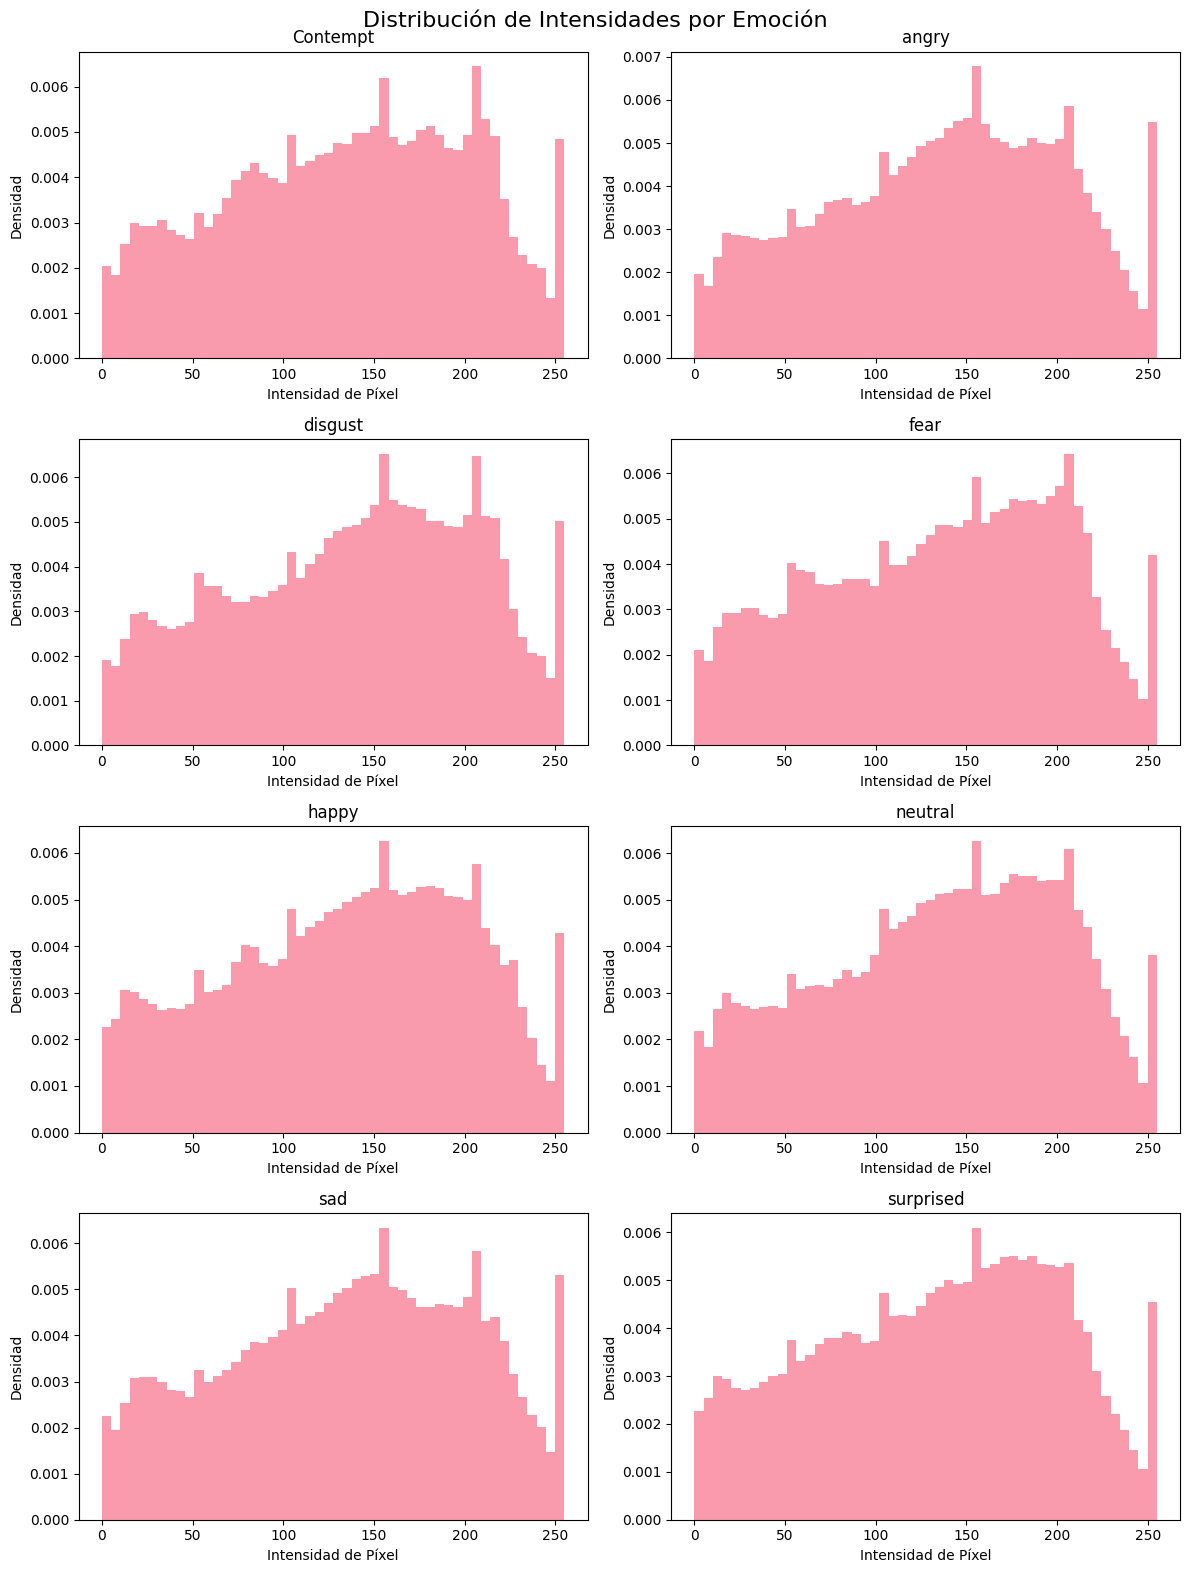

In [ ]:
# Visualizar distribución de intensidades
#fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
fig.suptitle('Distribución de Intensidades por Emoción', fontsize=16)

for idx, emotion in enumerate(emotions):
    emotion_mask = emotion_names_array == emotion
    emotion_images = X[emotion_mask]

    # row = idx // 4
    # col = idx % 4

    row = idx // 2
    col = idx % 2

    # Histograma de intensidades
    axes[row, col].hist(emotion_images.flatten(), bins=50, alpha=0.7, density=True)
    axes[row, col].set_title(f'{emotion}')
    axes[row, col].set_xlabel('Intensidad de Píxel')
    axes[row, col].set_ylabel('Densidad')

plt.tight_layout()
plt.show()

In [ ]:
print("\n" + "="*50)
print("7. DIVISIÓN DEL DATASET (70% - 30%):")

from sklearn.model_selection import train_test_split

# Primera división: 80% entrenamiento, 20% temporal
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


7. DIVISIÓN DEL DATASET (70% - 30%):


In [ ]:
# Mostrar información de la división
print(f"Conjunto de entrenamiento: {X_train.shape[0]} imágenes ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Conjunto de prueba: {X_test.shape[0]} imágenes ({X_test.shape[0]/len(X)*100:.1f}%)")

Conjunto de entrenamiento: 106 imágenes (69.7%)
Conjunto de prueba: 46 imágenes (30.3%)


In [ ]:
# Verificar distribución por clase en cada conjunto
train_dist = Counter(y_train)
test_dist = Counter(y_test)

division_df = pd.DataFrame({
    'Emotion': emotions,
    'Train': [train_dist[i] for i in range(len(emotions))],
    'Test': [test_dist[i] for i in range(len(emotions))]
})

print("\nDistribución por emoción en cada conjunto:")
print(division_df)


Distribución por emoción en cada conjunto:
     Emotion  Train  Test
0   Contempt     13     6
1      angry     14     5
2    disgust     13     6
3       fear     13     6
4      happy     13     6
5    neutral     14     5
6        sad     13     6
7  surprised     13     6


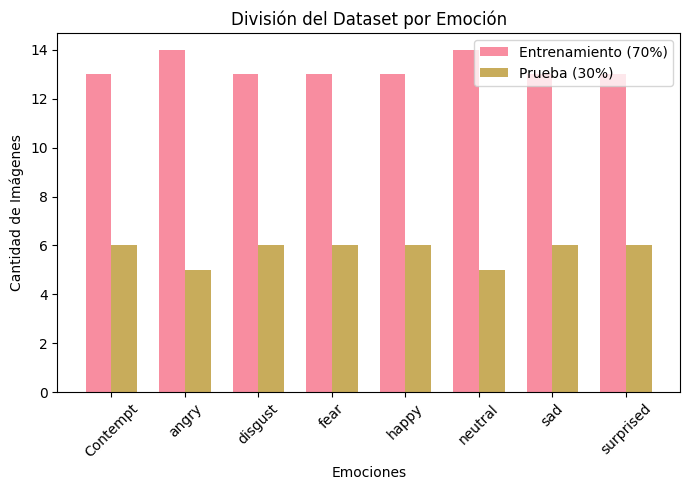

In [ ]:
# Visualizar la división
# fig, ax = plt.subplots(1, 1, figsize=(12, 6))
# x_pos = np.arange(len(emotions))
# width = 0.25

# ax.bar(x_pos - width/2, division_df['Train'], width, label='Entrenamiento (70%)', alpha=0.8)
# ax.bar(x_pos + width/2, division_df['Test'], width, label='Prueba (30%)', alpha=0.8)

# ax.set_title('División del Dataset por Emoción')
# ax.set_xlabel('Emociones')
# ax.set_ylabel('Número de Imágenes')
# ax.set_xticks(x_pos)
# ax.set_xticklabels(emotions, rotation=45)
# ax.legend()

# plt.tight_layout()
# plt.show()



plt.figure(figsize=(7, 5))
x_pos = np.arange(len(emotions))
width = 0.35
plt.bar(x_pos - width/2, division_df['Train'], width, label='Entrenamiento (70%)', alpha=0.8)
plt.bar(x_pos + width/2, division_df['Test'], width, label='Prueba (30%)', alpha=0.8)
plt.title('División del Dataset por Emoción')
plt.xlabel('Emociones')
plt.ylabel('Cantidad de Imágenes')
plt.xticks(x_pos, emotions, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print("\n" + "="*50)
print("8. PREPARACIÓN FINAL PARA CNN:")

# Redimensionar para CNN (agregar dimensión de canal)
# X_train_cnn = X_train.reshape(X_train.shape[0], 48, 48, 1)
# X_test_cnn = X_test.reshape(X_test.shape[0], 48, 48, 1)

X_train_cnn = X_train  # Ya está en forma (n, 224, 224, 3)
X_test_cnn = X_test    # Ya está en forma (n, 224, 224, 3)

#X_train_cnn = np.array([cv2.resize(img, (128, 128)) for img in X_train]).astype('float32')
#X_test_cnn = np.array([cv2.resize(img, (128, 128)) for img in X_test]).astype('float32')

# X_train_cnn = X_train.reshape(X_train.shape[0], 128, 128, 1)
# X_test_cnn = X_test.reshape(X_test.shape[0], 128, 128, 1)

print(f"Forma de datos de entrenamiento para CNN: {X_train_cnn.shape}")
print(f"Forma de datos de prueba para CNN: {X_test_cnn.shape}")




8. PREPARACIÓN FINAL PARA CNN:
Forma de datos de entrenamiento para CNN: (106, 128, 128, 3)
Forma de datos de prueba para CNN: (46, 128, 128, 3)


In [ ]:
# Aplicar preprocesamiento específico de ResNet50

#from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input


X_train_cnn = preprocess_input(X_train_cnn)
X_test_cnn = preprocess_input(X_test_cnn)

4


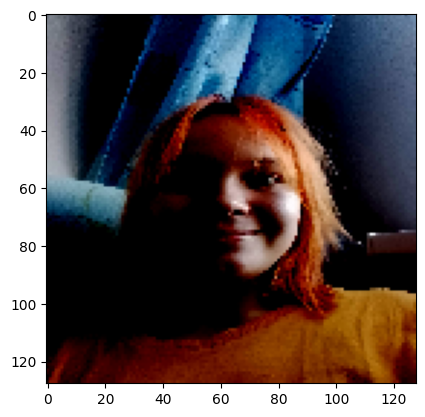

In [ ]:
i = 3
plt.imshow(X_train[i])
print(y_train[i])

In [ ]:
# Convertir etiquetas a categorical (one-hot encoding)
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Convertir a one-hot
y_train_categorical = to_categorical(y_train, num_classes=len(emotions))
y_test_categorical = to_categorical(y_test, num_classes=len(emotions))

print(f"Forma de etiquetas (one-hot): {y_train_categorical.shape}")
print(f"Número de clases: {len(emotions)}")

Forma de etiquetas (one-hot): (106, 8)
Número de clases: 8


## Entrenamiento del modelo

In [ ]:
import tensorflow as tf
#from tensorflow.keras.applications import ResNet50

from tensorflow.keras.applications import MobileNetV2

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import time

In [ ]:
# Configurar GPU si está disponible
print(f"GPU disponible: {tf.config.list_physical_devices('GPU')}")

GPU disponible: []


In [ ]:
# Configurar semilla para reproducibilidad
tf.random.set_seed(42)
np.random.seed(42)


In [ ]:
# Configuración de 5-fold CV
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Listas para almacenar resultados de cada fold
fold_accuracies = []
fold_val_accuracies = []
fold_histories = []
fold_predictions = []
fold_true_labels = []

In [ ]:
# Configuración del modelo
#img_height, img_width = 224, 224
img_height, img_width = 128, 128
num_classes = len(emotions)
batch_size = 32
epochs = 20

In [ ]:
print(f"Configuración del entrenamiento:")
print(f"- Folds: {n_folds}")
print(f"- Epochs por fold: {epochs}")
print(f"- Batch size: {batch_size}")
print(f"- Clases: {num_classes}")
print(f"- Tamaño de imagen: {img_height}x{img_width}")

Configuración del entrenamiento:
- Folds: 5
- Epochs por fold: 20
- Batch size: 32
- Clases: 8
- Tamaño de imagen: 128x128


In [ ]:
# Comenzar entrenamiento con CV
start_time = time.time()

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_cnn, y_train)):
    print(f"\n{'='*20} FOLD {fold+1}/{n_folds} {'='*20}")

    # Dividir datos para este fold
    X_fold_train, X_fold_val = X_train_cnn[train_idx], X_train_cnn[val_idx]
    y_fold_train, y_fold_val = y_train_categorical[train_idx], y_train_categorical[val_idx]

    print(f"Entrenamiento: {X_fold_train.shape[0]} muestras")
    print(f"Validación: {X_fold_val.shape[0]} muestras")

    # Crear modelo base ResNet50
    # base_model = ResNet50(
    #     weights='imagenet',
    #     include_top=False,
    #     input_shape=(img_height, img_width, 3)
    # )

    base_model = MobileNetV2(
        weights='imagenet',
        include_top=False,
        input_shape=(img_height, img_width, 3),
        alpha=1.0  # Factor de ancho del modelo (1.0 = modelo completo)
    )

    # Congelar las capas base inicialmente
    base_model.trainable = False

    # Agregar capas personalizadas
    inputs = tf.keras.Input(shape=(img_height, img_width, 3))
    x = base_model(inputs, training=False)

    # x = GlobalAveragePooling2D()(x)
    # x = Dropout(0.3)(x)

    # x = Dense(1024, activation='relu')(x)
    # x = Dropout(0.5)(x)

    # x = Dense(1024, activation='relu')(x)
    # x = Dropout(0.5)(x)

    # x = Dense(1024, activation='relu')(x)
    # x = Dropout(0.5)(x)

    # x = Dense(512, activation='relu')(x)
    # x = Dropout(0.5)(x)

    # outputs = Dense(num_classes, activation='softmax')(x)

    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.2)(x)  # Menos dropout

    x = Dense(512, activation='relu')(x)  # Menos neuronas
    x = Dropout(0.3)(x)

    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)

    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)

    # Compilar modelo
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Callbacks
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=0.0001,
        verbose=1
    )

    # Entrenar con capas base congeladas
    history_frozen = model.fit(
        X_fold_train, y_fold_train,
        batch_size=batch_size,
        epochs=epochs//2,
        validation_data=(X_fold_val, y_fold_val),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # Descongelar algunas capas para fine-tuning
    base_model.trainable = True

    for layer in base_model.layers[:151]:
        layer.trainable = False

    #print(f"Fine-tuning desde la capa 150...")

    # Recompilar con learning rate más bajo
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Continuar entrenamiento con fine-tuning
    history_fine = model.fit(
        X_fold_train, y_fold_train,
        batch_size=batch_size,
        epochs=epochs//2,
        validation_data=(X_fold_val, y_fold_val),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # Combinar historias
    combined_history = {}
    for key in history_frozen.history.keys():
        combined_history[key] = history_frozen.history[key] + history_fine.history[key]

    # Evaluar modelo en el fold de validación
    val_loss, val_accuracy = model.evaluate(X_fold_val, y_fold_val, verbose=0)
    train_loss, train_accuracy = model.evaluate(X_fold_train, y_fold_train, verbose=0)

    print(f"Fold {fold+1} - Precisión entrenamiento: {train_accuracy:.4f}")
    print(f"Fold {fold+1} - Precisión validación: {val_accuracy:.4f}")

    # Predicciones para este fold
    val_predictions = model.predict(X_fold_val, verbose=0)
    val_pred_classes = np.argmax(val_predictions, axis=1)
    val_true_classes = np.argmax(y_fold_val, axis=1)

    # Almacenar resultados
    fold_accuracies.append(train_accuracy)
    fold_val_accuracies.append(val_accuracy)
    fold_histories.append(combined_history)
    fold_predictions.extend(val_pred_classes)
    fold_true_labels.extend(val_true_classes)

    # Limpiar memoria
    del model, base_model
    tf.keras.backend.clear_session()


==================== FOLD 1/5 ====================
Entrenamiento: 84 muestras
Validación: 22 muestras
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.1241 - loss: 2.5897 - val_accuracy: 0.0909 - val_loss: 2.4379 - learning_rate: 0.0010
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 420ms/step - accuracy: 0.2067 - loss: 2.0213 - val_accuracy: 0.0455 - val_loss: 2.6278 - learning_rate: 0.0010
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 417ms/step - accuracy: 0.3268 - loss: 1.8300 - val_accuracy: 0.0455 - val_loss: 2.8241 - learning_rate: 0.0010
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.3638 - loss: 1.5971
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 421ms/step - accuracy: 0.3622 - loss: 1.6078 - val_accuracy: 0.0000e+00 - val_loss: 2.9502 - learning_rate: 0.0010
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 426ms/step - accuracy: 0.4723 - loss: 1.4256 - val_accuracy: 0.0455 - val_loss: 2.9677 - learning_rate: 2.

In [ ]:
total_time = time.time() - start_time

In [ ]:
print(f"Tiempo total de entrenamiento: {total_time/60:.2f} minutos")
print(f"Tiempo promedio por fold: {total_time/(60*n_folds):.2f} minutos")

Tiempo total de entrenamiento: 3.65 minutos
Tiempo promedio por fold: 0.73 minutos


In [ ]:
print(f"\nPrecisiones por fold:")
for i, (train_acc, val_acc) in enumerate(zip(fold_accuracies, fold_val_accuracies)):
    print(f"Fold {i+1}: Train={train_acc:.4f}, Val={val_acc:.4f}")


Precisiones por fold:
Fold 1: Train=0.2976, Val=0.0455
Fold 2: Train=0.4588, Val=0.0476
Fold 3: Train=0.4353, Val=0.0476
Fold 4: Train=0.7412, Val=0.0000
Fold 5: Train=0.4118, Val=0.0476


In [ ]:
print(f"\nEstadísticas finales:")
print(f"Precisión promedio entrenamiento: {np.mean(fold_accuracies):.4f} ± {np.std(fold_accuracies):.4f}")
print(f"Precisión promedio validación: {np.mean(fold_val_accuracies):.4f} ± {np.std(fold_val_accuracies):.4f}")


Estadísticas finales:
Precisión promedio entrenamiento: 0.4689 ± 0.1469
Precisión promedio validación: 0.0377 ± 0.0188


In [ ]:
# Matriz de confusión global del CV
cm_cv = confusion_matrix(fold_true_labels, fold_predictions)
classification_rep = classification_report(
    fold_true_labels,
    fold_predictions,
    target_names=emotions,
    output_dict=True
)

In [ ]:
print("Reporte de clasificación (Cross-Validation):")
print(classification_report(fold_true_labels, fold_predictions, target_names=emotions))

Reporte de clasificación (Cross-Validation):
              precision    recall  f1-score   support

    Contempt       0.10      0.08      0.09        13
       angry       0.00      0.00      0.00        14
     disgust       0.00      0.00      0.00        13
        fear       0.00      0.00      0.00        13
       happy       0.09      0.15      0.11        13
     neutral       0.06      0.07      0.07        14
         sad       0.00      0.00      0.00        13
   surprised       0.00      0.00      0.00        13

    accuracy                           0.04       106
   macro avg       0.03      0.04      0.03       106
weighted avg       0.03      0.04      0.03       106



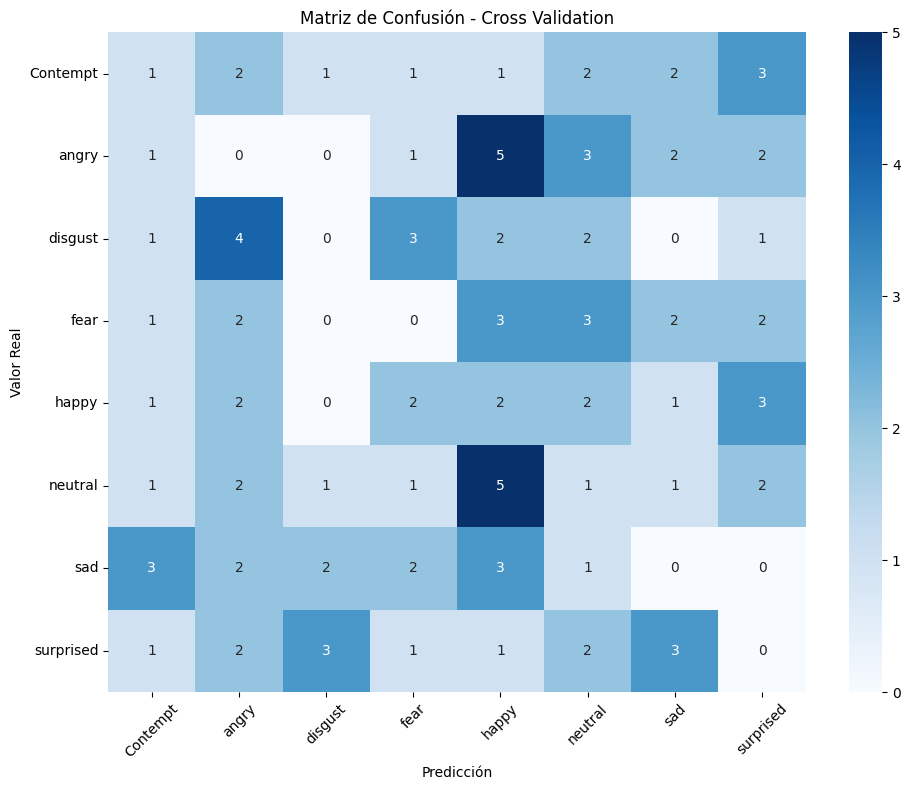

In [ ]:
# Visualizar matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm_cv, annot=True, fmt='d', cmap='Blues',
            xticklabels=emotions, yticklabels=emotions)
plt.title('Matriz de Confusión - Cross Validation')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

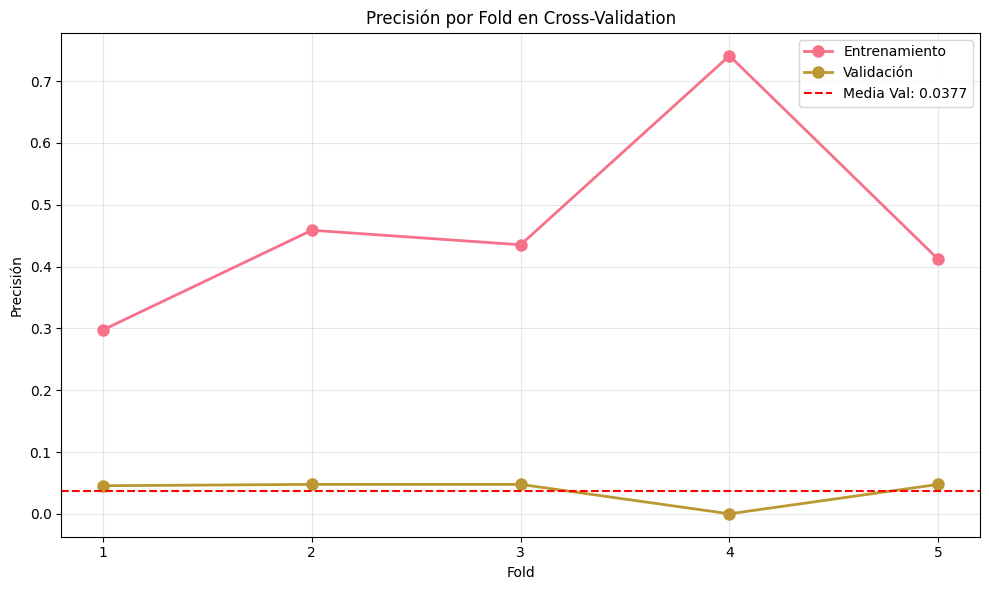

In [ ]:
# Gráfico de precisiones por fold
plt.figure(figsize=(10, 6))
x_folds = range(1, n_folds + 1)
plt.plot(x_folds, fold_accuracies, 'o-', label='Entrenamiento', linewidth=2, markersize=8)
plt.plot(x_folds, fold_val_accuracies, 'o-', label='Validación', linewidth=2, markersize=8)
plt.axhline(y=np.mean(fold_val_accuracies), color='red', linestyle='--',
            label=f'Media Val: {np.mean(fold_val_accuracies):.4f}')
plt.xlabel('Fold')
plt.ylabel('Precisión')
plt.title('Precisión por Fold en Cross-Validation')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(x_folds)
plt.tight_layout()
plt.show()

In [ ]:
# Crear modelo final
# base_model_final = ResNet50(
#     weights='imagenet',
#     include_top=False,
#     input_shape=(img_height, img_width, 3)
# )

base_model_final = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, 3),
    alpha=1.0  # Factor de ancho del modelo (1.0 = modelo completo)
)

base_model_final.trainable = False

inputs_final = tf.keras.Input(shape=(img_height, img_width, 3))
# x_final = base_model_final(inputs_final, training=False)

# x_final = GlobalAveragePooling2D()(x_final)
# x_final = Dropout(0.3)(x_final)

# x_final = Dense(1024, activation='relu')(x_final)
# x_final = Dropout(0.5)(x_final)

# x_final = Dense(1024, activation='relu')(x_final)
# x_final = Dropout(0.5)(x_final)

# x_final = Dense(1024, activation='relu')(x_final)
# x_final = Dropout(0.5)(x_final)

# x_final = Dense(512, activation='relu')(x_final)
# x_final = Dropout(0.5)(x_final)

x_final = base_model_final(inputs_final, training=False)

x_final = GlobalAveragePooling2D()(x_final)
x_final = Dropout(0.2)(x_final)

x_final = Dense(512, activation='relu')(x_final)
x_final = Dropout(0.3)(x_final)

x_final = Dense(256, activation='relu')(x_final)
x_final = Dropout(0.3)(x_final)


outputs_final = Dense(num_classes, activation='softmax')(x_final)

model_final = Model(inputs_final, outputs_final)

model_final.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Entrenar fase 1 (capas congeladas)
print("Fase 1: Entrenando con capas base congeladas...")
history_final_frozen = model_final.fit(
    X_train_cnn, y_train_categorical,
    batch_size=batch_size,
    epochs=epochs//2,
    validation_data=(X_test_cnn, y_test_categorical),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


Fase 1: Entrenando con capas base congeladas...
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.0702 - loss: 2.8896 - val_accuracy: 0.1087 - val_loss: 2.4260 - learning_rate: 0.0010
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 856ms/step - accuracy: 0.1629 - loss: 2.3064 - val_accuracy: 0.0217 - val_loss: 2.4314 - learning_rate: 0.0010
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 489ms/step - accuracy: 0.1710 - loss: 2.0751 - val_accuracy: 0.0217 - val_loss: 2.5066 - learning_rate: 0.0010
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.2199 - loss: 2.0852
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 405ms/step - accuracy: 0.2269 - loss: 2.0665 - val_accuracy: 0.0217 - val_loss: 2.5930 - learning_rate: 0.0010
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 470ms/step - accuracy: 0.2566 - loss: 1.8356 - val_accuracy: 0.0217 - val_loss: 2.6212 - learning_rate: 2.0000e-04
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 404ms/step 

In [ ]:
for i, layer in enumerate(base_model_final.layers):
  print(i, layer.name)

0 input_layer
1 Conv1
2 bn_Conv1
3 Conv1_relu
4 expanded_conv_depthwise
5 expanded_conv_depthwise_BN
6 expanded_conv_depthwise_relu
7 expanded_conv_project
8 expanded_conv_project_BN
9 block_1_expand
10 block_1_expand_BN
11 block_1_expand_relu
12 block_1_pad
13 block_1_depthwise
14 block_1_depthwise_BN
15 block_1_depthwise_relu
16 block_1_project
17 block_1_project_BN
18 block_2_expand
19 block_2_expand_BN
20 block_2_expand_relu
21 block_2_depthwise
22 block_2_depthwise_BN
23 block_2_depthwise_relu
24 block_2_project
25 block_2_project_BN
26 block_2_add
27 block_3_expand
28 block_3_expand_BN
29 block_3_expand_relu
30 block_3_pad
31 block_3_depthwise
32 block_3_depthwise_BN
33 block_3_depthwise_relu
34 block_3_project
35 block_3_project_BN
36 block_4_expand
37 block_4_expand_BN
38 block_4_expand_relu
39 block_4_depthwise
40 block_4_depthwise_BN
41 block_4_depthwise_relu
42 block_4_project
43 block_4_project_BN
44 block_4_add
45 block_5_expand
46 block_5_expand_BN
47 block_5_expand_relu


In [ ]:
# Fase 2: Fine-tuning
base_model_final.trainable = True

for layer in base_model_final.layers[:151]:
    layer.trainable = False

# for layer in base_model_final.layers[150:]:
#   layer.trainable = True


In [ ]:
model_final.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history_final_fine = model_final.fit(
    X_train_cnn, y_train_categorical,
    batch_size=batch_size,
    epochs=epochs//2,
    validation_data=(X_test_cnn, y_test_categorical),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.1760 - loss: 2.1585 - val_accuracy: 0.0870 - val_loss: 2.4169 - learning_rate: 1.0000e-04
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 489ms/step - accuracy: 0.2046 - loss: 1.9676 - val_accuracy: 0.0652 - val_loss: 2.4214 - learning_rate: 1.0000e-04
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 509ms/step - accuracy: 0.3059 - loss: 1.8320 - val_accuracy: 0.0870 - val_loss: 2.4302 - learning_rate: 1.0000e-04
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 888ms/step - accuracy: 0.3034 - loss: 1.8048 - val_accuracy: 0.0652 - val_loss: 2.4551 - learning_rate: 1.0000e-04
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 508ms/step - accuracy: 0.3513 - loss: 1.6867 - val_accuracy: 0.0652 - val_loss: 2.4934 - learning_rate: 1.0000e-04
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 490ms/step - accuracy: 0.3605 - loss: 1.6847 - val_accuracy: 0.0435 - val_loss: 2.5353 - learning_rate: 1.0000e-04
Epoch 6: early stopping
Restoring model weights from the end of the best epoch

Text(0.5, 1.0, 'Training Accuracy')

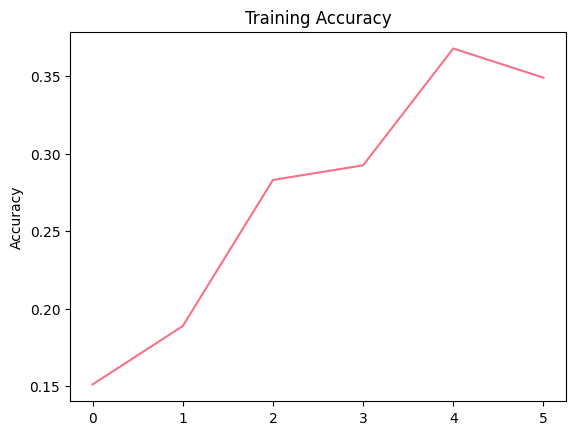

In [ ]:
acc = history_final_fine.history['accuracy']


plt.figure()
plt.plot(acc, label='Training Accuracy')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')



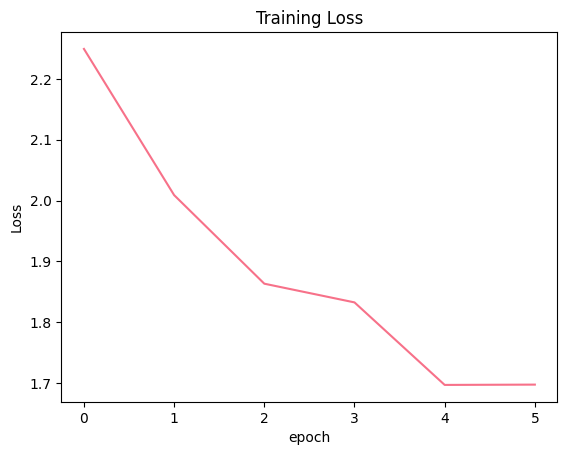

In [ ]:
loss = history_final_fine.history['loss']

plt.figure()

plt.plot(loss, label='Training Loss')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()



In [ ]:

# Evaluar modelo final
test_loss, test_accuracy = model_final.evaluate(X_test_cnn, y_test_categorical, verbose=0)
print(f"Precisión en conjunto de prueba: {test_accuracy:.4f}")

Precisión en conjunto de prueba: 0.0870


In [ ]:
# Predicciones finales
test_predictions = model_final.predict(X_test_cnn, verbose=0)
test_pred_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(y_test_categorical, axis=1)

In [ ]:
# Reporte final
print("\nReporte de clasificación final:")
print(classification_report(test_true_classes, test_pred_classes, target_names=emotions))


Reporte de clasificación final:
              precision    recall  f1-score   support

    Contempt       0.00      0.00      0.00         6
       angry       0.00      0.00      0.00         5
     disgust       0.00      0.00      0.00         6
        fear       0.00      0.00      0.00         6
       happy       0.00      0.00      0.00         6
     neutral       0.22      0.40      0.29         5
         sad       0.11      0.33      0.17         6
   surprised       0.00      0.00      0.00         6

    accuracy                           0.09        46
   macro avg       0.04      0.09      0.06        46
weighted avg       0.04      0.09      0.05        46



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


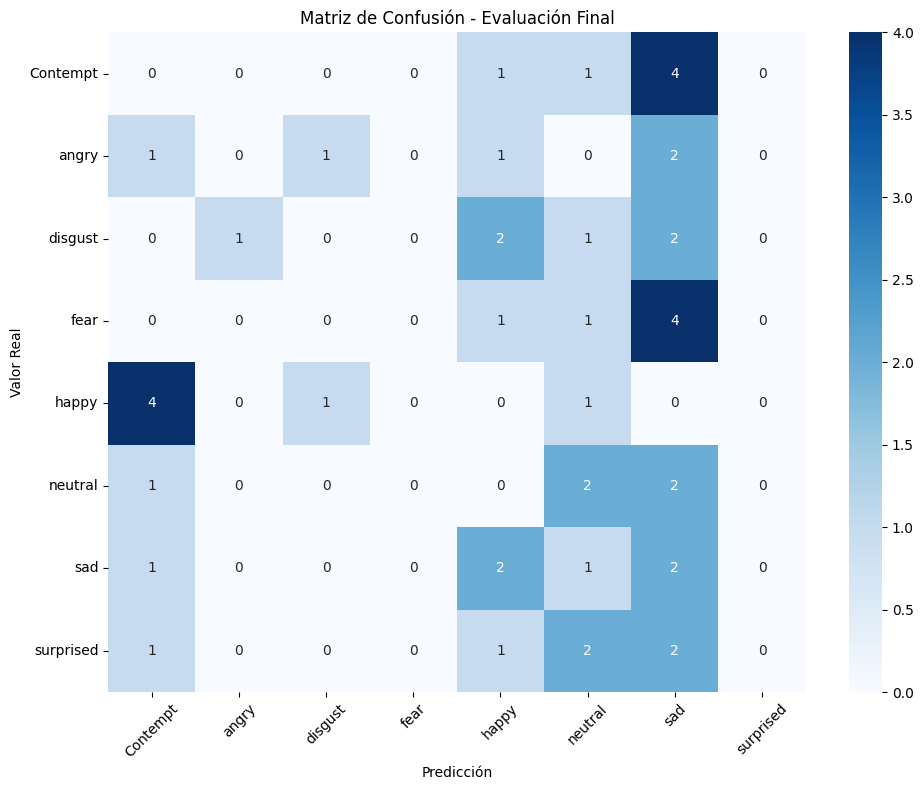

In [ ]:
# Matriz de confusión final
cm_final = confusion_matrix(test_true_classes, test_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues',
            xticklabels=emotions, yticklabels=emotions)
plt.title('Matriz de Confusión - Evaluación Final')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Combinar historias del modelo final
combined_history_final = {}
for key in history_final_frozen.history.keys():
    combined_history_final[key] = history_final_frozen.history[key] + history_final_fine.history[key]

In [ ]:
print("\n" + "="*50)
print("15. RESUMEN FINAL:")
print(f"✓ Cross-Validation completado: {np.mean(fold_val_accuracies):.4f} ± {np.std(fold_val_accuracies):.4f}")
print(f"✓ Modelo final entrenado: {test_accuracy:.4f} en conjunto de prueba")
print(f"✓ Tiempo total: {total_time/60:.2f} minutos")
print(f"✓ Dataset: {len(X)} imágenes, {num_classes} clases")


15. RESUMEN FINAL:
✓ Cross-Validation completado: 0.0377 ± 0.0188
✓ Modelo final entrenado: 0.0870 en conjunto de prueba
✓ Tiempo total: 3.65 minutos
✓ Dataset: 152 imágenes, 8 clases


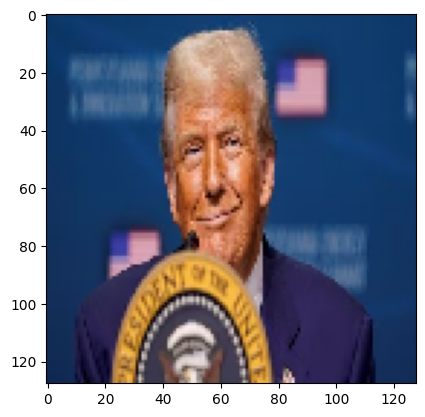

In [ ]:
sample_image3 = tf.keras.preprocessing.image.load_img(r'/content/USA-TRUMP--33_1752611616927_1752611623293_1752687957274.avif', target_size=(128,128))
plt.imshow(sample_image3)

In [ ]:
sample_image3 = tf.keras.preprocessing.image.img_to_array(sample_image3)
sample_image3 = np.expand_dims(sample_image3, axis =0)
sample_image3 = preprocess_input(sample_image3)
prediction = model_final.predict(sample_image3)

print('prediction: ', prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
prediction:  [[0.09804323 0.07868263 0.0947572  0.02831232 0.20622095 0.11400588
  0.1422075  0.23777023]]


Predicción para trump.jpg:
Emoción detectada: surprised
Confianza: 23.78%

Todas las probabilidades:
Contempt: 9.80%
angry: 7.87%
disgust: 9.48%
fear: 2.83%
happy: 20.62%
neutral: 11.40%
sad: 14.22%
surprised: 23.78%


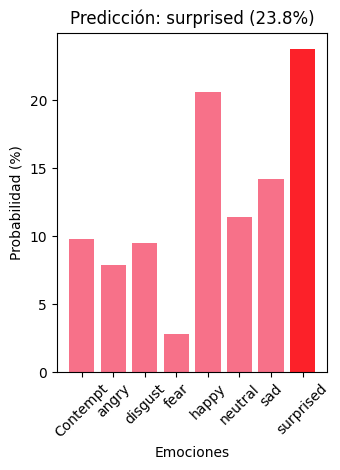

In [ ]:
predicted_class_idx = np.argmax(prediction[0])
predicted_emotion = emotions[predicted_class_idx]
confidence = prediction[0][predicted_class_idx] * 100

print(f"Predicción para trump.jpg:")
print(f"Emoción detectada: {predicted_emotion}")
print(f"Confianza: {confidence:.2f}%")

# Mostrar todas las probabilidades
print(f"\nTodas las probabilidades:")
for i, emotion in enumerate(emotions):
    prob = prediction[0][i] * 100
    print(f"{emotion}: {prob:.2f}%")

# Crear gráfico de barras con las probabilidades
plt.subplot(1, 2, 2)
plt.bar(emotions, prediction[0] * 100)
plt.title(f'Predicción: {predicted_emotion} ({confidence:.1f}%)')
plt.xlabel('Emociones')
plt.ylabel('Probabilidad (%)')
plt.xticks(rotation=45)

# Resaltar la predicción más alta
max_idx = np.argmax(prediction[0])
plt.bar(emotions[max_idx], prediction[0][max_idx] * 100, color='red', alpha=0.7)

plt.tight_layout()
plt.show()

